In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/content/graph-wavenet/garage

/content/drive/MyDrive/content/graph-wavenet/garage


# train-log 전처리

In [96]:
import pandas as pd
import re

def parse_text_to_dataframe(text):
    pattern = r'Epoch: (\d+), Train Loss: ([\d.]+), Train MAPE: ([\d.]+), Train RMSE: ([\d.]+), Valid Loss: ([\d.]+), Valid MAPE: ([\d.]+), Valid RMSE: ([\d.]+), Training Time: ([\d.]+)'
    data = []

    group = re.findall(pattern, text)

    for element in group:
        epoch = int(element[0])
        train_loss = float(element[1])
        train_mape = float(element[2])
        train_rmse = float(element[3])
        valid_loss = float(element[4])
        valid_mape = float(element[5])
        valid_rmse = float(element[6])
        training_time = float(element[7])

        data.append({
            'Epoch': epoch,
            'Train Loss': train_loss,
            'Train MAPE': train_mape,
            'Train RMSE': train_rmse,
            'Valid Loss': valid_loss,
            'Valid MAPE': valid_mape,
            'Valid RMSE': valid_rmse,
            'Training Time': training_time
        })

    df = pd.DataFrame(data)
    df.set_index('Epoch', inplace=True)
    return df

def parse_best_model_on_test(test):
  pattern = r'Evaluate best model on test data for horizon (\d+), Test MAE: ([\d.]+), Test MAPE: ([\d.]+), Test RMSE: ([\d.]+)'
  data = []

  group = re.findall(pattern, text)
  for element in group:
        horizon = int(element[0])
        Test_loss = float(element[1])
        Test_mape = float(element[2])
        Test_rmse = float(element[3])

        data.append({
            'Horizon': horizon,
            'Test Loss': Test_loss,
            'Test MAPE': Test_mape,
            'Test RMSE': Test_rmse,
        })

  df = pd.DataFrame(data)
  df.set_index('Horizon', inplace=True)
  return df

In [97]:
file_path = "training_log.txt"

with open(file_path, "r") as file:
    text = file.read()

train_df = parse_text_to_dataframe(text)
test_df = parse_best_model_on_test(text)
valid_loss = re.findall(r'The valid loss on best model is [\d.]+', text)[0]

In [ ]:
train_df.head()

,Train Loss,Train MAPE,Train RMSE,Valid Loss,Valid MAPE,Valid RMSE,Training Time
Epoch,,,,,,,
1,2.7422,0.0322,4.4833,2.4751,0.0299,4.2734,29.9406
2,2.4649,0.0288,4.1368,2.3942,0.0291,4.1781,29.9063
3,2.3829,0.0279,4.0621,2.3917,0.0288,4.2216,30.6161
4,2.3519,0.0276,4.0327,2.3668,0.0286,4.1591,30.4502
5,2.3286,0.0273,4.0112,2.3945,0.0293,4.1534,30.2999


In [ ]:
test_df.head()

,Test Loss,Test MAPE,Test RMSE
Horizon,,,
1,1.4838,0.0166,2.3233
2,1.6523,0.0188,2.7171
3,1.7689,0.0203,2.9916
4,1.8688,0.0217,3.2231
5,1.9522,0.0228,3.4204


In [ ]:
valid_loss

'The valid loss on best model is 2.0258'

# Train-log 시각화

### Epoch에 따른 Train, Valid loss

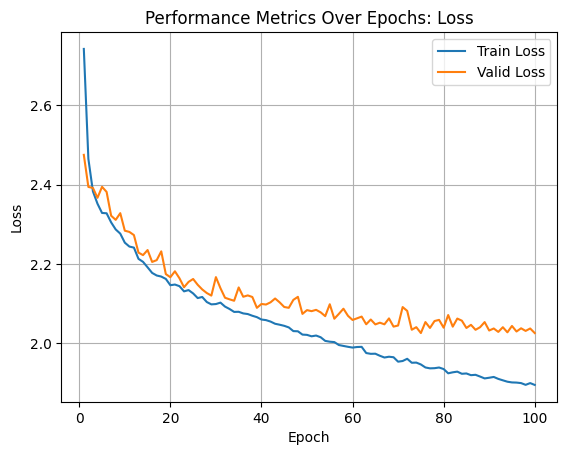

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_df.index, train_df['Train Loss'], label='Train Loss')
plt.plot(train_df.index, train_df['Valid Loss'], label='Valid Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Performance Metrics Over Epochs: Loss')
plt.legend()
plt.grid(True)
plt.show()

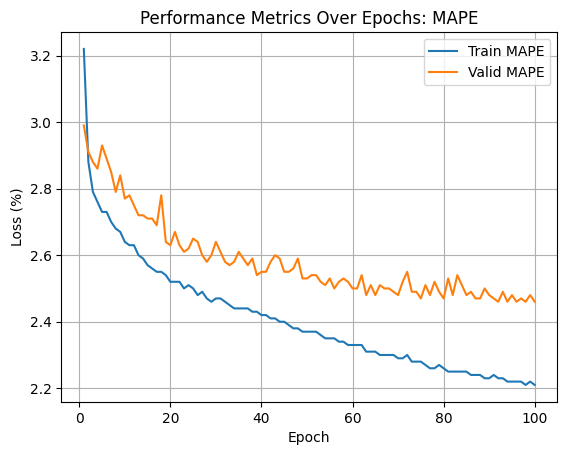

In [ ]:
train_mape = train_df['Train MAPE'] * 100
valid_mape = train_df['Valid MAPE'] * 100

plt.plot(train_df.index, train_mape, label='Train MAPE')
plt.plot(train_df.index, valid_mape, label='Valid MAPE')
plt.xlabel('Epoch')
plt.ylabel('Loss (%)')
plt.title('Performance Metrics Over Epochs: MAPE')
plt.legend()
plt.grid(True)
plt.show()

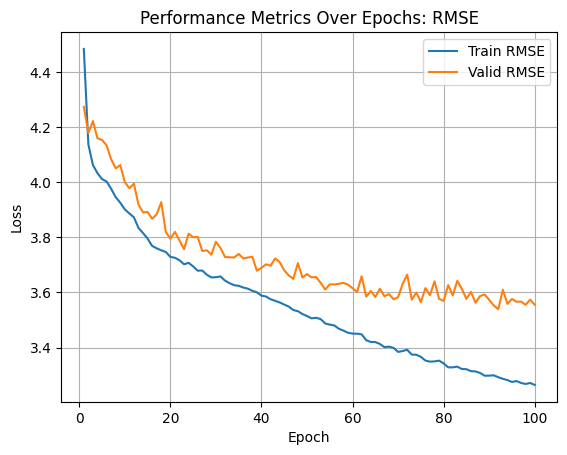

In [ ]:
plt.plot(train_df.index, train_df['Train RMSE'], label='Train RMSE')
plt.plot(train_df.index, train_df['Valid RMSE'], label='Valid RMSE')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Performance Metrics Over Epochs: RMSE')
plt.legend()
plt.grid(True)
plt.show()

### horizon(15min)에 따른 예측 성능

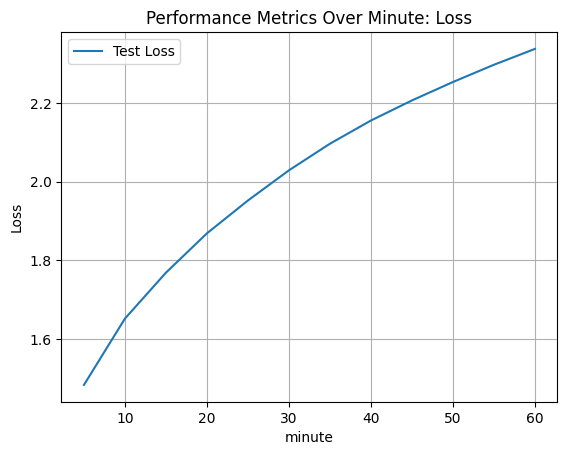

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

index = test_df.index * 5
plt.plot(index, test_df['Test Loss'], label='Test Loss')

plt.xlabel('minute')
plt.ylabel('Loss')
plt.title('Performance Metrics Over Minute: Loss')
plt.legend()
plt.grid(True)
plt.show()

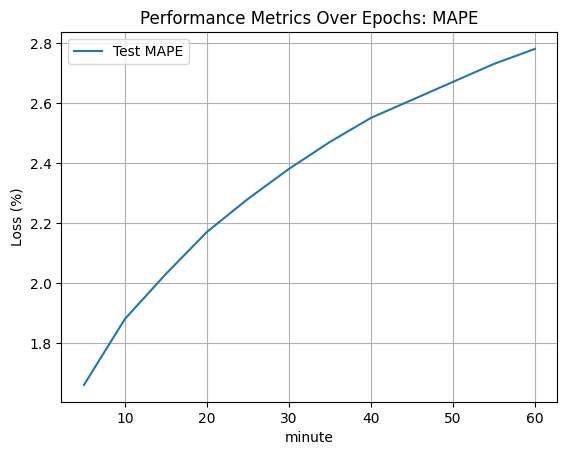

In [99]:
import matplotlib.pyplot as plt


index = test_df.index * 5
mape = test_df['Test MAPE'] * 100
plt.plot(index, mape, label='Test MAPE')

plt.xlabel('minute')
plt.ylabel('Loss (%)')
plt.title('Performance Metrics Over Epochs: MAPE')
plt.legend()
plt.grid(True)
plt.show()

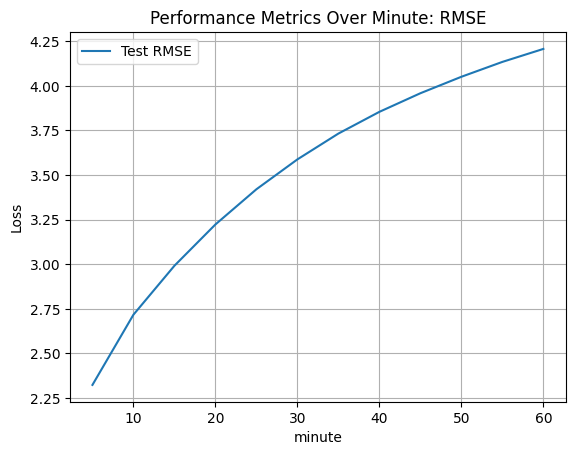

In [98]:
import matplotlib.pyplot as plt


index = test_df.index * 5
plt.plot(index, test_df['Test RMSE'], label='Test RMSE')

plt.xlabel('minute')
plt.ylabel('Loss')
plt.title('Performance Metrics Over Minute: RMSE')
plt.legend()
plt.grid(True)
plt.show()

### 15min, 30min, 60min prediction loss

In [101]:
prediction = test_df.iloc[[2, 5, 11]]
prediction.index = prediction.index * 5
prediction.head()

,Test Loss,Test MAPE,Test RMSE
Horizon,,,
15,1.7689,0.0203,2.9916
30,2.0288,0.0238,3.5879
60,2.3372,0.0278,4.2073
